In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/projectnb/vkolagrp/spuduch/ml_data_filtered.csv')
test_data= pd.read_csv('/projectnb/vkolagrp/spuduch/ml_test_data_filtered.csv')

# drop dups
train_data.drop_duplicates(subset='NACCID', inplace=True)
test_data.drop_duplicates(subset='NACCID', inplace=True)
# data = pd.concat([train_data, test_data])

train_NACCIDs = train_data['NACCID']
test_NACCIDs = test_data['NACCID']

/scratch/911199.1.cds/ipykernel_2747608/3238115181.py:4: DtypeWarning: Columns (275,279,283,296,301,306,347,348,349,350,351,352,353,420,431,472,475,489,491,493,495,497,499,501,654,656,678,687,868,893,982,1092,1215,1216,1224,1225,1226,1227,1237,1262,1284,1289,1459,1463,1466,1664,1666,1669,1676,1678,1680,1681,1688,1690,1692,1694,1695,1702,1717,1731,1745,1759,1761,1813,1815,1817,1819,1821,1823,1825,1827,1829,1831,1833,1835,1837,1839,1841,1843,1845,1847,1849,1851,1853,1855,1857,1859,1861,1863,1865,1867,2070,2154) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/projectnb/vkolagrp/spuduch/ml_data_filtered.csv')


In [3]:
test_data

,CASEID,mri_name_vol,Sequence_type_vol,acq_type_vol,3rd-Ventricle_vol,4th-Ventricle_vol,Brain-Stem_vol,CC_Anterior,CC_Central,CC_Mid_Anterior,...,ARTHLOEX,NACCAANX,NACCNREX,his_NACCAGE,his_SEX,his_RACE,his_HISPANIC,his_HISPOR,his_EDUC,nAD
0,CASE_1,CASE_1_COR_GRADIENT_T1_3D_1,T1,3D,1992.328,1690.372,13545.890,0.0,0.0,0.0,...,NaN,0,1,92.0,female,whi,no,0,14.0,0
1,CASE_2,CASE_2_AX_3D_MPR_3D_3,T1,3D,2402.920,1657.865,17534.419,0.0,0.0,0.0,...,NaN,0,1,84.0,female,whi,no,0,13.0,0
2,CASE_4,CASE_4_MPRAGE_SAG_ISO_3D_1,T1,3D,1276.696,1283.476,21583.682,0.0,0.0,0.0,...,NaN,0,1,66.0,male,whi,no,0,8.0,0
3,CASE_5,CASE_5_MPR_CORONAL_3D_10,T1,3D,1429.030,1705.549,18501.103,0.0,0.0,0.0,...,NaN,1,0,67.0,female,whi,no,0,18.0,0
4,CASE_7,CASE_7_COR_GRADIENT_T1_3D_1,T1,3D,2478.019,1706.380,20128.913,0.0,0.0,0.0,...,NaN,0,0,81.0,male,whi,no,0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,CASE_55,CASE_55_MPRAGE_3D_1,T1,3D,1488.967,1653.763,22704.544,0.0,0.0,0.0,...,NaN,0,1,67.0,male,whi,no,0,14.0,0
66,CASE_62,CASE_62_Axial_3dspgr-lowe_3D_1,T1,3D,2540.961,1102.806,20980.510,0.0,0.0,0.0,...,NaN,0,0,44.0,male,whi,no,0,12.0,1
67,CASE_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,64.0,female,whi,yes,5,3.0,0
68,CASE_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,73.0,male,whi,no,0,18.0,0


In [4]:
alldata = pd.read_csv('/projectnb/vkolagrp/spuduch/ml_data_updated.csv')

alldata = alldata[alldata['NACCID'].isin(test_NACCIDs)]
alldata.drop_duplicates(subset=['NACCID'], inplace=True)

/scratch/911199.1.cds/ipykernel_2747608/446445921.py:1: DtypeWarning: Columns (275,277,279,283,296,299,301,303,306,345,346,347,348,349,350,351,352,353,354,355,356,420,431,434,444,472,475,477,483,487,489,491,493,495,497,499,501,503,505,507,509,511,513,515,517,519,521,523,525,527,652,654,656,674,676,678,687,700,709,860,868,893,929,945,962,965,982,993,1086,1090,1092,1098,1159,1215,1216,1224,1225,1226,1227,1237,1259,1262,1265,1284,1289,1459,1463,1466,1662,1664,1666,1667,1669,1676,1678,1680,1681,1688,1690,1692,1694,1695,1702,1717,1731,1745,1759,1761,1813,1815,1817,1819,1821,1823,1825,1827,1829,1831,1833,1835,1837,1839,1841,1843,1845,1847,1849,1851,1853,1855,1857,1859,1861,1863,1865,1867,1932,1936,2070,2079,2154) have mixed types. Specify dtype option on import or set low_memory=False.
  alldata = pd.read_csv('/projectnb/vkolagrp/spuduch/ml_data_updated.csv')


In [8]:
(alldata['NACCAUTP'] == 1).sum()

np.int64(26)

In [35]:
# add test_data to alldata
# data = pd.concat([test_data, alldata])

# remove test_data from alldata
alldata = alldata[~alldata['NACCID'].isin(test_NACCIDs)]

# how many cases in alldata have NACCAUTP = 1
print(alldata['NACCAUTP'].value_counts())
print(alldata['NC'].value_counts())
print(alldata['MCI'].value_counts())
print(alldata['DE'].value_counts())



# drop duplicates
data.drop_duplicates(subset='NACCID', inplace=True)

NACCAUTP
8    2744
1     298
0     216
Name: count, dtype: int64
NC
1    2256
0    1002
Name: count, dtype: int64
MCI
0    2359
1     899
Name: count, dtype: int64
DE
0    3258
Name: count, dtype: int64


In [36]:
# load in the xgboost model from joblib
import joblib

model = joblib.load('/projectnb/vkolagrp/spuduch/xgb_model_AD.joblib')

# what features were used in the model
demo_features = [
    'his_NACCAGE', 'his_SEX', 'his_RACE', 'his_HISPANIC', 'his_HISPOR', 'his_EDUC',
]

region_names = [ 
 '3rd-Ventricle',
 '4th-Ventricle',
 'Brain-Stem',
 'CSF',
 'Cbm_Left_CrusI',
 'Cbm_Left_CrusII',
 'Cbm_Left_IX',
 'Cbm_Left_I_IV',
 'Cbm_Left_V',
 'Cbm_Left_VI',
 'Cbm_Left_VIIIa',
 'Cbm_Left_VIIIb',
 'Cbm_Left_VIIb',
 'Cbm_Left_X',
 'Cbm_Right_CrusI',
 'Cbm_Right_CrusII',
 'Cbm_Right_IX',
 'Cbm_Right_I_IV',
 'Cbm_Right_V',
 'Cbm_Right_VI',
 'Cbm_Right_VIIIa',
 'Cbm_Right_VIIIb',
 'Cbm_Right_VIIb',
 'Cbm_Right_X',
 'Cbm_Vermis_IX',
 'Cbm_Vermis_VI',
 'Cbm_Vermis_VII',
 'Cbm_Vermis_VIII',
 'Cbm_Vermis_X',
 'Left-Accumbens-area',
 'Left-Amygdala',
 'Left-Caudate',
 'Left-Cerebellum-Cortex',
 'Left-Cerebellum-White-Matter',
 'Left-Cerebral-White-Matter',
 'Left-Hippocampus',
 'Left-Inf-Lat-Vent',
 'Left-Lateral-Ventricle',
 'Left-Pallidum',
 'Left-Putamen',
 'Left-Thalamus',
 'Left-VentralDC',
 'Left-choroid-plexus',
 'Right-Accumbens-area',
 'Right-Amygdala',
 'Right-Caudate',
 'Right-Cerebellum-Cortex',
 'Right-Cerebellum-White-Matter',
 'Right-Cerebral-White-Matter',
 'Right-Hippocampus',
 'Right-Inf-Lat-Vent',
 'Right-Lateral-Ventricle',
 'Right-Pallidum',
 'Right-Putamen',
 'Right-Thalamus',
 'Right-VentralDC',
 'Right-choroid-plexus',
 'WM-hypointensities',
 'ctx-lh-caudalanteriorcingulate',
 'ctx-lh-caudalmiddlefrontal',
 'ctx-lh-cuneus',
 'ctx-lh-entorhinal',
 'ctx-lh-fusiform',
 'ctx-lh-inferiorparietal',
 'ctx-lh-inferiortemporal',
 'ctx-lh-insula',
 'ctx-lh-isthmuscingulate',
 'ctx-lh-lateraloccipital',
 'ctx-lh-lateralorbitofrontal',
 'ctx-lh-lingual',
 'ctx-lh-medialorbitofrontal',
 'ctx-lh-middletemporal',
 'ctx-lh-paracentral',
 'ctx-lh-parahippocampal',
 'ctx-lh-parsopercularis',
 'ctx-lh-parsorbitalis',
 'ctx-lh-parstriangularis',
 'ctx-lh-pericalcarine',
 'ctx-lh-postcentral',
 'ctx-lh-posteriorcingulate',
 'ctx-lh-precentral',
 'ctx-lh-precuneus',
 'ctx-lh-rostralanteriorcingulate',
 'ctx-lh-rostralmiddlefrontal',
 'ctx-lh-superiorfrontal',
 'ctx-lh-superiorparietal',
 'ctx-lh-superiortemporal',
 'ctx-lh-supramarginal',
 'ctx-lh-transversetemporal',
 'ctx-rh-caudalanteriorcingulate',
 'ctx-rh-caudalmiddlefrontal',
 'ctx-rh-cuneus',
 'ctx-rh-entorhinal',
 'ctx-rh-fusiform',
 'ctx-rh-inferiorparietal',
 'ctx-rh-inferiortemporal',
 'ctx-rh-insula',
 'ctx-rh-isthmuscingulate',
 'ctx-rh-lateraloccipital',
 'ctx-rh-lateralorbitofrontal',
 'ctx-rh-lingual',
 'ctx-rh-medialorbitofrontal',
 'ctx-rh-middletemporal',
 'ctx-rh-paracentral',
 'ctx-rh-parahippocampal',
 'ctx-rh-parsopercularis',
 'ctx-rh-parsorbitalis',
 'ctx-rh-parstriangularis',
 'ctx-rh-pericalcarine',
 'ctx-rh-postcentral',
 'ctx-rh-posteriorcingulate',
 'ctx-rh-precentral',
 'ctx-rh-precuneus',
 'ctx-rh-rostralanteriorcingulate',
 'ctx-rh-rostralmiddlefrontal',
 'ctx-rh-superiorfrontal',
 'ctx-rh-superiorparietal',
 'ctx-rh-superiortemporal',
 'ctx-rh-supramarginal',
 'ctx-rh-transversetemporal',
]



labels = ['AD', 'nAD']
# imag_features actually needs _vol and _wmh appended to each
imag_features = []
vol_features = []
wmh_features = []
for region in region_names:
    imag_features.append(region + '_vol')
    vol_features.append(region + '_vol')
    imag_features.append(region + '_wmh')
    wmh_features.append(region + '_wmh')
imag_features.append('total_wm_burden')
# imag_features.append('total_mb_burden')
imag_features = [f for f in imag_features]

data = data.astype({'his_SEX': 'category', 'his_RACE': 'category', 'his_HISPANIC': 'category', 'his_HISPOR': 'category'})

# predict on the data
X = data[demo_features + imag_features]
y_pred = model.predict_proba(X)[:, 1]
y_pred


array([0.99670273, 0.9994518 , 0.90884465, ..., 0.9914909 , 0.8295853 ,
       0.85856354], dtype=float32)

In [37]:
# merge predictions with data
data['AD_pred'] = y_pred

/scratch/9999846.1.cbm.q/ipykernel_3705355/2196162772.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['AD_pred'] = y_pred


In [9]:

cols = ['NACCAUTP', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 
   'NACCVASC', 'NACCAMY', 'NPLINF', 'NPLAC', 'NPHEM', 'NPMICRO', 'NACCMICR',
   'NACCLEWY', 'NPFTDTAU', 'NPTAU', 'NPCERAD', 'NACCDIFF']

# print the counts of each column
for col in cols:
   # drop -4 and 8
   alldata[col].replace(-4, np.nan, inplace=True)
   alldata[col].replace(8, np.nan, inplace=True)
   # collapse categories other than 0 to 1
   print(alldata[col].value_counts())
   alldata[col].replace([2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
   
   print('\n\n')

NACCAUTP
1.0    26
0.0    13
Name: count, dtype: int64



NPTHAL
0.0    7
4.0    5
5.0    5
3.0    1
Name: count, dtype: int64



NACCBRAA
0.0    8
6.0    6
5.0    3
3.0    2
2.0    2
1.0    2
4.0    2
Name: count, dtype: int64



NACCNEUR
0.0    14
3.0     7
2.0     3
1.0     2
Name: count, dtype: int64



NPADNC
3.0    8
0.0    7
1.0    3
Name: count, dtype: int64



NACCDIFF
0.0    12
3.0     9
1.0     4
2.0     1
Name: count, dtype: int64



NACCVASC
1.0    23
0.0     3
Name: count, dtype: int64



NACCAMY
0.0    17
2.0     4
3.0     3
1.0     2
Name: count, dtype: int64



NPLINF
2.0    7
9.0    1
Name: count, dtype: int64



NPLAC
2.0    8
Name: count, dtype: int64



NPHEM
2.0    8
Name: count, dtype: int64



NPMICRO
2.0    7
9.0    1
Name: count, dtype: int64



NACCMICR
0.0    22
1.0     3
9.0     1
Name: count, dtype: int64



NACCLEWY
0.0    19
2.0     3
3.0     3
4.0     1
Name: count, dtype: int64



NPFTDTAU
0.0    18
Name: count, dtype: int64



NPTAU
2.0    7
3.0    1


/scratch/911199.1.cds/ipykernel_2747608/3703525310.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alldata[col].replace(-4, np.nan, inplace=True)
/scratch/911199.1.cds/ipykernel_2747608/3703525310.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [10]:
predictions_df = pd.read_csv('/projectnb/vkolagrp/spuduch/ml_test_data_AD_nAD(FTD,VD,PRD)_pred.csv')
predictions_df.rename(columns={'AD':'AD_pred', 'nAD':'nAD_pred'}, inplace=True)
prediction_cols = predictions_df.columns.to_list()
print(predictions_df.columns)
neuropath_df = pd.merge(alldata, predictions_df, on=['NACCID'], how='inner')
print(neuropath_df.columns)
neuropath_df[prediction_cols + cols]
# neuropath_df['AD']

Index(['AD_pred', 'nAD_pred', 'CASEID', 'NACCID'], dtype='object')
Index(['imag_data_index', 'fname', 'NACCID', 'month_imag', 'day_imag',
       'year_imag', 'mri_name_vol', '3rd-Ventricle_vol', '4th-Ventricle_vol',
       'Brain-Stem_vol',
       ...
       'DLB', 'VD', 'PRD', 'NPH', 'SEF', 'PSY', 'ODE', 'AD_pred', 'nAD_pred',
       'CASEID'],
      dtype='object', length=2210)


,AD_pred,nAD_pred,CASEID,NACCID,NACCAUTP,NPTHAL,NACCBRAA,NACCNEUR,NPADNC,NACCDIFF,...,NPLINF,NPLAC,NPHEM,NPMICRO,NACCMICR,NACCLEWY,NPFTDTAU,NPTAU,NPCERAD,NACCDIFF
0,0.243909,0.515519,CASE_23,NACC006571,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
1,0.990991,0.002472,CASE_70,NACC043867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.969010,0.150928,CASE_9,NACC046496,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,1.0
3,0.745904,0.058494,CASE_62,NACC063341,1.0,NaN,0.0,0.0,NaN,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,1.0
4,0.951832,0.035098,CASE_46,NACC086064,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.990301,0.090858,CASE_49,NACC914480,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,0.865835,0.523027,CASE_39,NACC952943,1.0,NaN,0.0,0.0,NaN,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,0.0
65,0.997599,0.009958,CASE_60,NACC958213,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,0.880245,0.100919,CASE_11,NACC982446,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
neuropath_df = data.copy()
neuropath_df.reset_index(inplace=True)

In [55]:
# NACCUDSD
# 1 = Normal cognition 
# 2 = Impaired-not-MCI 
# 3 = MCI
neuropath_df['NACCUDSD'] = neuropath_df['NACCUDSD'].map({
    1: 'Normal cognition',
    2: 'Impaired-not-MCI',
    3: 'MCI'
})

# filter neuropath_df to only include MCI cases
neuropath_df = neuropath_df[neuropath_df['NACCUDSD'] == 'MCI']

In [56]:
neuropath_df

,index,CASEID,mri_name_vol,Sequence_type_vol,acq_type_vol,3rd-Ventricle_vol,4th-Ventricle_vol,Brain-Stem_vol,CC_Anterior,CC_Central,...,LBOCGMO,LBOCGYR,LBOCGDY,LBOCGPOS,LBOCGAVL,VisitDate,DateDifference,PDD,DLB,AD_pred
70,0,NaN,1.3.46.670589.11.5730.5.0.5928.201612011301437...,NaN,NaN,1607.253,1732.110,18516.093,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2016-11-01,30 days,0.0,0.0,0.970432
76,11,NaN,1.2.840.113619.2.134.1762534283.3040.123497173...,NaN,NaN,1664.103,1795.128,20528.959,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2009-01-07,43 days,0.0,0.0,0.981792
80,21,NaN,1.3.12.2.1107.5.99.2.3097.30000011010523375021...,NaN,NaN,1282.970,1928.654,17939.492,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2011-01-04,0 days,0.0,0.0,0.561392
81,22,NaN,1.3.12.2.1107.5.2.43.66044.2016061614175825708...,NaN,NaN,2031.700,2029.573,20905.281,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2016-03-23,85 days,0.0,0.0,0.992491
83,24,NaN,1.2.840.113619.2.134.1762534283.1942.130014030...,NaN,NaN,2939.100,3127.896,20653.791,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2011-04-25,2 days,0.0,0.0,0.949737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,7503,NaN,1.3.12.2.1107.5.2.19.45255.2019101807170981847...,NaN,NaN,1124.749,1506.468,21536.791,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2019-10-17,1 days,0.0,0.0,0.974791
3315,7507,NaN,1.3.12.2.1107.5.2.19.45255.2019111410481663938...,NaN,NaN,2165.667,1722.715,21888.049,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2019-10-17,28 days,0.0,0.0,0.850581
3320,7524,NaN,1.3.12.2.1107.5.2.43.167046.202002101510169457...,NaN,NaN,2252.286,2882.879,21491.124,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2020-01-28,13 days,0.0,0.0,0.885010
3323,7543,NaN,1.3.12.2.1107.5.2.32.35006.2010042613590590166...,NaN,NaN,2464.865,1572.439,19907.421,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2010-09-17,144 days,0.0,0.0,0.954765


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to conduct a one-sided Mann-Whitney U test
def mannwhitneyu_test(group1, group2):
    stat, p_value = stats.mannwhitneyu(group1, group2, alternative='less')
    # print(f"p-value: {p_value}")

    # calcualte the p-values for each of the NACCUDSD groups too
    stat, p_value1 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Normal cognition'], group2[neuropath_df['NACCUDSD'] == 'Normal cognition'], alternative='less')
    stat, p_value2 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], group2[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], alternative='less')
    stat, p_value3 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'MCI'], group2[neuropath_df['NACCUDSD'] == 'MCI'], alternative='less')

    print(f"p-value: {p_value}, p-value Normal cognition: {p_value1}, p-value Impaired-not-MCI: {p_value2}, p-value MCI: {p_value3}")
    return p_value

# Function to add significance stars based on p-value
def add_significance_stars(p_value, ax, x_positions):
    significance_level = ''
    if p_value < 0.001:
        significance_level = '***'
    elif p_value < 0.01:
        significance_level = '**'
    elif p_value < 0.05:
        significance_level = '*'
    
    if significance_level:
        ax.text(x_positions[1], 1.05, significance_level, ha='center', va='center', color='black', fontsize=14)

# Function to create boxplot and swarmplot with statistical significance
def create_plot(neuropath_df, col, labels, ax, label_pred = 'AD_pred', label_name = 'P(AD)'):
    # Create boxplot and swarmplot on the same axis
    
    sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='viridis')
    sns.swarmplot(x=col, y=label_pred, data=neuropath_df, ax=ax, size=5, color=".20")
    
    # Set labels dynamically based on the provided label dictionary
    ax.set_ylabel(label_name, fontsize=12)
    ax.set_xlabel(labels['X_axis'], fontsize=12)
    
    # Customize x-ticks dynamically based on the provided label dictionary
    x_ticks = list(map(int, labels['X_tics'].keys()))
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(labels['X_tics'].values(), rotation=labels.get('Rotation', 0), ha='center', fontsize=12)
    
    # Perform one-sided Mann-Whitney U test and add significance stars
    group_0 = neuropath_df[neuropath_df[col] == 0]['AD_pred']
    group_1 = neuropath_df[neuropath_df[col] == 1]['AD_pred']
    p_value = mannwhitneyu_test(group_0, group_1)
    
    add_significance_stars(p_value, ax, x_ticks)

neuropath_labels_AD = {
    'NPTHAL': {
        "X_axis": "Thal phase for amyloid plaques",
        "X_tics": {"0": "A0", "1": "A1-A3"},
        "Rotation": 0,
    },
    'NACCBRAA': {
        "X_axis": "Braak stage \nfor neurofibrillary \ndegeneration (NFD)",
        "X_tics": {"0": "B0", "1": "B1-B3"},
        "Rotation": 0,
    },
    'NACCNEUR': {
        "X_axis": "CERAD score for density \nof neocortical neuritic plaque",
        "X_tics": {"0": "C0", "1": "C1-C3"},
        "Rotation": 0,
    },
    'NACCDIFF': {
        "X_axis": "CERAD score for \ndensity of diffuse plaques",
        "X_tics": {"0": "No diffuse plaques", "1": "Diffuse plaques"},
        "Rotation": 0,
    }
}

# Loop through each column and plot
for col in neuropath_labels_AD.keys():
    # Collapse nonzero values to 1 (assuming binary classification)
    neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(3.5, 4))  # Small figure size
    
    # Create the plot with significance stars
    create_plot(neuropath_df, col, neuropath_labels_AD[col], ax)
    
    # Display the plot
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'/projectnb/vkolagrp/spuduch/{col}_npath.pdf')
    plt.close()


/scratch/911199.1.cds/ipykernel_2747608/2799192832.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/911199.1.cds/ipykernel_2747608/2799192832.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='viridis')
/scratch/911199.1.cd

p-value: 0.3957076420311714, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: nan
p-value: 0.0009476920232068973, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: nan


/scratch/911199.1.cds/ipykernel_2747608/2799192832.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/911199.1.cds/ipykernel_2747608/2799192832.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='viridis')
/scratch/911199.1.cd

p-value: 0.04243937338776718, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: nan
p-value: 0.22789426352775066, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: nan


/scratch/911199.1.cds/ipykernel_2747608/2799192832.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value1 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Normal cognition'], group2[neuropath_df['NACCUDSD'] == 'Normal cognition'], alternative='less')
/scratch/911199.1.cds/ipykernel_2747608/2799192832.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value2 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], group2[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], alternative='less')
/scratch/911199.1.cds/ipykernel_2747608/2799192832.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value3 = stats.mannwhitneyu(group1[neuropath

In [62]:
neuropath_labels_FTD = ['NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTD', 'NPFTDTDP']

for col in neuropath_labels_FTD:
    # print dist
    print(neuropath_df[col].value_counts())
    # collapse categories to 1
    neuropath_df[col].replace([2, 3, 4, 5, 6, 7], 1, inplace=True)
    neuropath_df[col].replace([-4, 8, 9], np.nan, inplace=True)

NPFTDTAU
0.0    78
1.0    19
Name: count, dtype: int64
NACCPICK
-4.0    793
 0.0    103
 1.0      2
 8.0      1
Name: count, dtype: int64
NPFTDT2
-4.0    824
 0.0     72
 8.0      2
 1.0      1
Name: count, dtype: int64
NACCCBD
-4.0    793
 0.0    104
 1.0      1
 8.0      1
Name: count, dtype: int64
NACCPROG
-4.0    793
 0.0    103
 1.0      2
 8.0      1
Name: count, dtype: int64
NPFTD
-4.0    868
 1.0     31
Name: count, dtype: int64
NPFTDTDP
-4.0    801
 0.0     85
 8.0     10
 1.0      3
Name: count, dtype: int64


/scratch/9999846.1.cbm.q/ipykernel_3705355/1408644948.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([2, 3, 4, 5, 6, 7], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1408644948.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

/scratch/9999846.1.cbm.q/ipykernel_3705355/3412912802.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')


p-value: 0.0027055620944670543, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: 0.0027055620944670543


/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value1 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Normal cognition'], group2[neuropath_df['NACCUDSD'] == 'Normal cognition'], alternative='less')
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value2 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], group2[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], alternative='less')


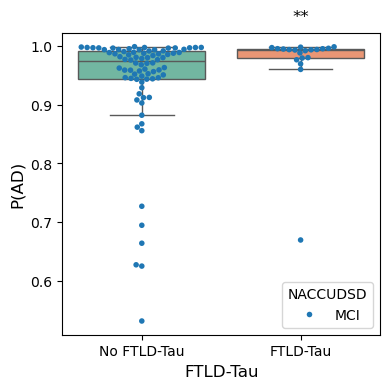

/scratch/9999846.1.cbm.q/ipykernel_3705355/3412912802.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')
/projectnb/vkolag

p-value: 0.4118807639030536, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: 0.4118807639030536


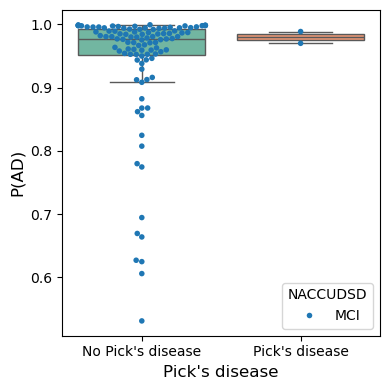

/scratch/9999846.1.cbm.q/ipykernel_3705355/3412912802.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')


p-value: 0.34332873671752645, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: 0.34332873671752645


/projectnb/vkolagrp/spuduch/.conda/envs/mri_radiology/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value1 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Normal cognition'], group2[neuropath_df['NACCUDSD'] == 'Normal cognition'], alternative='less')
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value2 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], group2[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], alterna

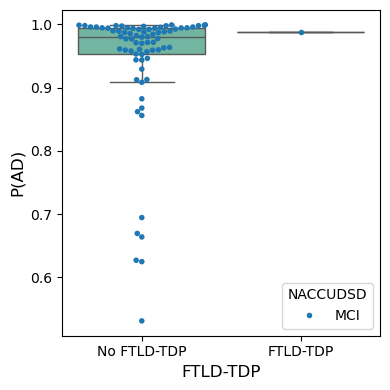

/scratch/9999846.1.cbm.q/ipykernel_3705355/3412912802.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')
/projectnb/vkolag

p-value: 0.10199581584184486, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: 0.10199581584184486


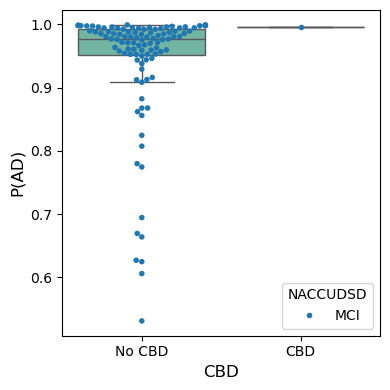

/scratch/9999846.1.cbm.q/ipykernel_3705355/3412912802.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')
/projectnb/vkolag

p-value: 0.5789728530982128, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: 0.5789728530982128


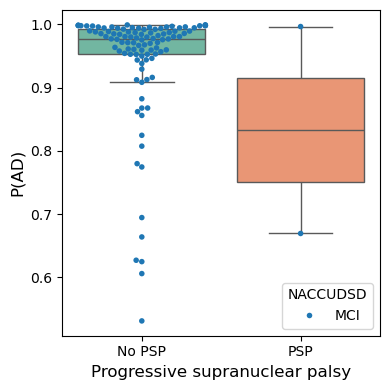

/scratch/9999846.1.cbm.q/ipykernel_3705355/3412912802.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')


p-value: nan, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: nan


/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = stats.mannwhitneyu(group1, group2, alternative='less')
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value1 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Normal cognition'], group2[neuropath_df['NACCUDSD'] == 'Normal cognition'], alternative='less')
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value2 = stats.mannwhitneyu(group1[neuropath_df['NACCUDSD'] == 'Impaired-not-MCI'], group2[neuropath_df['NACCUDSD'] == 'Impaired-not-

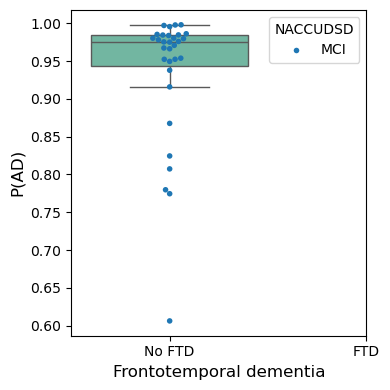

/scratch/9999846.1.cbm.q/ipykernel_3705355/3412912802.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
/scratch/9999846.1.cbm.q/ipykernel_3705355/1535215782.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')
/projectnb/vkolag

p-value: 0.6689076984428466, p-value Normal cognition: nan, p-value Impaired-not-MCI: nan, p-value MCI: 0.6689076984428466


/projectnb/vkolagrp/spuduch/.conda/envs/mri_radiology/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


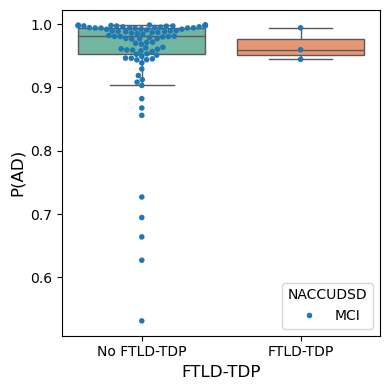

In [63]:
# create a plot for NPFTDTAU

neuropath_labels_FTD = {
    'NPFTDTAU': {
        "X_axis": "FTLD-Tau",
        "X_tics": {"0": "No FTLD-Tau", "1": "FTLD-Tau"},
        "Rotation": 0,
    },
    'NACCPICK': {
        "X_axis": "Pick's disease",
        "X_tics": {"0": "No Pick's disease", "1": "Pick's disease"},
        "Rotation": 0,
    },
    'NPFTDT2': {
        "X_axis": "FTLD-TDP",
        "X_tics": {"0": "No FTLD-TDP", "1": "FTLD-TDP"},
        "Rotation": 0,
    },
    'NACCCBD': {
        "X_axis": "CBD",
        "X_tics": {"0": "No CBD", "1": "CBD"},
        "Rotation": 0,
    },
    'NACCPROG': {
        "X_axis": "Progressive supranuclear palsy",
        "X_tics": {"0": "No PSP", "1": "PSP"},
        "Rotation": 0,
    },
    'NPFTD': {
        "X_axis": "Frontotemporal dementia",
        "X_tics": {"0": "No FTD", "1": "FTD"},
        "Rotation": 0,
    },
    'NPFTDTDP': {
        "X_axis": "FTLD-TDP",
        "X_tics": {"0": "No FTLD-TDP", "1": "FTLD-TDP"},
        "Rotation": 0,
    },
}

# Loop through each column and plot
for col in neuropath_labels_FTD.keys():
    # Collapse nonzero values to 1 (assuming binary classification)
    neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))  # Small figure size
    
    # Create the plot with significance stars
    create_plot(neuropath_df, col, neuropath_labels_FTD[col], ax)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close()

In [64]:
neuropath_labels_Vasc = ['NACCVASC', 'NACCAMY', 'NPLINF', 'NPLAC', 'NPINF']

for col in neuropath_labels_Vasc:
    # print dist
    print(neuropath_df[col].value_counts())

NACCVASC
1.0    127
0.0      2
Name: count, dtype: int64
NACCAMY
1.0    70
0.0    59
Name: count, dtype: int64
NPLINF
1.0    31
Name: count, dtype: int64
NPLAC
1.0    31
Name: count, dtype: int64
NPINF
-4.0    801
 0.0     84
 1.0     14
Name: count, dtype: int64


/scratch/9999846.1.cbm.q/ipykernel_3705355/1201471988.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)


ValueError: Could not interpret value `nAD_pred` for `y`. An entry with this name does not appear in `data`.

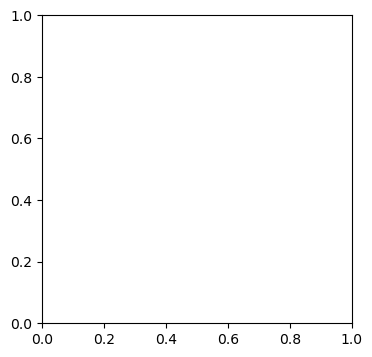

In [65]:
# do the plots

# Neuropathological labels 
neuropath_labels_Vasc = {
    'NACCVASC': {
        "X_axis": "Ischemic, hemorrhagic, \nor vascular pathology present",
        "X_tics": {"0": "No", "1": "Yes"},
        "Rotation": 0,
    },
    'NACCAMY': {
        "X_axis": "Cerebral amyloid angiopathy",
        "X_tics": {"0": "No", "1": "Yes"},
        "Rotation": 0,
    },
}

# Loop through each column and plot
for col in neuropath_labels_Vasc.keys():
    # Collapse nonzero values to 1 (assuming binary classification)
    neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))  # Small figure size
    
    # Create the plot with significance stars
    create_plot(neuropath_df, col, neuropath_labels_Vasc[col], ax, label_pred='nAD_pred', label_name='P(OIED)')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Prion

NACCPRIO
-4    42
 0    20
 1     6
Name: count, dtype: int64
p-value: 0.9983147287495113


/scratch/9971082.1.cbm.q/ipykernel_4189171/2984656375.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neuropath_df['NACCPRIO'].replace(-4, np.nan, inplace=True)
/scratch/9971082.1.cbm.q/ipykernel_4189171/252307490.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=label_pred, data=neuropath_df, ax=ax, showfliers=False, palette='Set2')


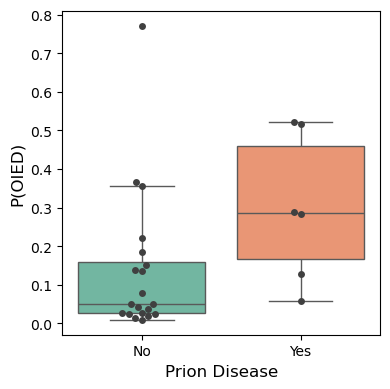

In [46]:
# NACCPRIO

print(neuropath_df['NACCPRIO'].value_counts())
neuropath_df['NACCPRIO'].replace(-4, np.nan, inplace=True)

# Neuropathological labels
neuropath_labels_PRD = {
    'NACCPRIO': {
        "X_axis": "Prion Disease",
        "X_tics": {"0": "No", "1": "Yes"},
        "Rotation": 0,
    }
}

# Loop through each column and plot
for col in neuropath_labels_PRD.keys():
    # Collapse nonzero values to 1 (assuming binary classification)
    neuropath_df[col].replace([1, 2, 3, 4, 5, 6, 7, 9], 1, inplace=True)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))  # Small figure size
    
    # Create the plot with significance stars
    create_plot(neuropath_df, col, neuropath_labels_PRD[col], ax, label_pred='nAD_pred', label_name='P(OIED)')
    
    # Display the plot
    plt.tight_layout()
    plt.show()